<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<h1 align="center">Organization Info</h1> 

* Дедлайн **20 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task6.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

# Home work 1: Basic Artificial Neural Networks

Credit https://github.com/yandexdataschool/YSDA_deeplearning17, https://github.com/DmitryUlyanov


Зачем это всё нужно?! Зачем понимать как работают нейросети внутри когда уже есть куча библиотек?
- Время от времени Ваши сети не учатся, веса становятся nan-ами, все расходится и разваливается -- это можно починить если понимать бекпроп
- Если Вы не понимаете как работают оптимизаторы, то не сможете правильно выставить гиперпарааметры :) и тоже ничего выучить не выйдет
- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b

The goal of this homework is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design of was heavily inspired by [Torch](http://torch.ch) which is the most convenient neural network environment when the work involves defining new layers. 

This homework requires sending **"multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- hw6_Modules.ipynb

If you want to read more about backprop this links can be helpfull:
- http://udacity.com/course/deep-learning--ud730 
- http://cs231n.stanford.edu/2016/syllabus.html 
- http://www.deeplearningbook.org 

<h1 align="center">Check Questions</h1> 

**Вопрос 1**: Чем нейросети отличаются от линейных моделей, а чем похожи? 

**Ответ:** Нейросеть - нелинейная модель в общем случае. В них могут быть линейные слои и линейные модели можно назвать частным случаем нейросетей. Однако, при ряде оговорок, нейронные сети могут обобщать существенно больший класс функций, а не только линейные.

**Вопрос 2**: В чем недостатки полносвзяных нейронных сетей, какая мотивация к использованию свёрточных?

**Ответ:** Мотивация - устойчивость к сдвигам и дейформациям изображений, распознавание небольших (относительно всего изображения) обьектов на изображении. Аналогичные полносвязные сети лучше переобучаются.

**Вопрос 3**: Какие слои используются в современных нейронных сетях? Опишите как работает каждый слой и свою интуицию зачем он нужен.

    - DenceLayer -- линейное преобразование Wx + b, можно интерпретировать как веса связей между двумя слоями нейронов и их начальное состояние
    - SoftMax - реализован во втором файле, поэтому что такое пояснять не нужно, используется для преобразования признаков в что-то, что можно интерпретировать как вероятности
    - Dropout - слой, который обнуляет некоторые признаки, похож на отмирание нейронов/связей в естественных сетях и используется для борьбы с переобучением
    - ReLU - активационный слой, который обнуляет значения, которые меньше нуля, нужен для внесения нелинейности в модель (иначе слои можно выкинуть и считать обычную линейную модель), при многих оговорках такое внесение нелинейности позволяет нейросетям приближать функции из очень широкого класса
    - LeakyReLU - аналог предыдущего, но отрицательные значения не зануляются, а умножаются на очень маленьких положительный коэффициент. Нужен, чтобы исправить недостатки ReLU, возникающие при вычислениях на реальных компьютерах (очень большие коэффициенты)
    - ELU - аналог предыдущего, но отрицательные коэффициенты приближаются экспонентой.
    - Свёрточный слой - осуществляет "свёртку изображения" (копировать картинки с лекции малополезно), зачем нужен - описано выше.
    - Max/Min Pooling - слой делится на участки, в каждом из которых берётся минимум/максимум .... Ещё один способ добавить нелинейность.
    
    
    
**Вопрос 4**: Может ли нейросеть решать задачу регрессии, какой компонент для этого нужно заменить в нейросети из лекции 1?

**Ответ:** Да, могут. Нужно заменить, последний слой, собственно, во втором файле реализован MSECriterion, например.


**Вопрос 5**: Почему обычные методы оптимизации плохо работают с нейросетями? А какие работают хорошо? Почему они работают хорошо?

**Ответ:** Что такое **обычные методы**? Например, обычный стохастический градиентный спуск совместно с backprop'ом работают хорошо, обычная модификация SGD "momentum", как показано ниже тоже как-то работает. Скорее всего под **обычными методами** подразумеваются те, что требуют аналитических вычислений, например градиента, в сетях так не работает, поскольку архитектур очень много, а считать для конкретной архитектуры что-то очень долго и не нужно, т.к. есть backprop.

**Вопрос 6**: Для чего нужен backprop, чем это лучше/хуже чем считать градиенты без него? Почему backprop эффективно считается на GPU?

**Ответ:** Вычислить градиенты аналитически обычно слишком сложно и не нужно, а backprop применим к очень широкому классу сетей, т.е. не думая можно применять один и тот же алгоритм для разных подходов, что здорово. Считается эффективно на GPU, поскольку выполняется очень много очень простых операций, и в при обработке каждого слоя их можно исполнять параллельно, используя большое число пусть и простых, но всё же достаточных для этого вычислительных ядер видеокарт. Например, в 1050 есть 640 ядер CUDA, что гораздо больше, чем число ядер процессора и backprop может нагрузить эти 640 ядер, давая прирост производительности сравнимый с увеличением числа процессоров.

**Вопрос 7**: Почему для нейросетей не используют кросс валидацию, что вместо неё? Можно ли ее использовать?

**Ответ:** Как минимум - долго (= дорого) обучать сеть несколько раз. Можно использовать train_test_split, например. Тем более, что для обучения сетей обычно собирают очень много данных.

**Вопрос 8**: Небольшой quiz который поможет разобраться со свертками https://www.youtube.com/watch?v=DDRa5ASNdq4 

<img src="img/conv.png" width="600">

**Ответ:**

Т.к. формально не было обьяснено, что такое "same" - будем считать, что мы позволяем фильтру выступать на одну клетку за край сверху и снизу. Тогда и размер будет "same". В случае в valid будем считать, что за край фильтр не выходит, т.е. мы теряем правую и нижнюю полосы пикселей, т.к. 3 + 2k - нечётное число. Также, по условию, будем считать, что мы имеем восемь фильтров (написано же, что output depth = 8). Тогда:

<table>
    <tr>
        <td>padding</td>
        <td>stride</td>
        <td>width</td>
        <td>height</td>
        <td>depth</td>
    </tr>
    <tr>
        <td>same</td>
        <td>1</td>
        <td>28</td>
        <td>28</td>
        <td>8</td>
    </tr>
    <tr>
        <td>valid</td>
        <td>1</td>
        <td>26</td>
        <td>26</td>
        <td>8</td>
    </tr>
    <tr>
        <td>valid</td>
        <td>2</td>
        <td>13</td>
        <td>13</td>
        <td>8</td>
    </tr>
</table>

-------------

Политика списывания. Вы можете обсудить решение с одногрупниками, так интереснее и веселее :) 
Не шарьте друг-другу код, в этом случаи вы ничему не научитесь -- "мыши плакали кололись но продолжали жрать кактус".

Теперь формально. Разница между списыванием и помощью товарища иногда едва различима. Мы искренне надеемся, что при любых сложностях вы можете обратиться к семинаристам и с их подсказками **самостоятельно** справиться с заданием. При зафиксированных случаях списывания (одинаковый код, одинаковые ошибки), баллы за задание будут обнулены всем участникам инцидента.

In [2]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Важно 

    - Не забывайте делать GradCheck, чтобы проверить численно что производные правильные, обычно с первого раза не выходит никогда,   пример тут https://goo.gl/pzvzfe
    - Ваш код не должен содержать циклов, все вычисления должны бить векторные, внутри numpy 
    

# Framework

Implement everything in `Modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return AND store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

In [176]:
"""
    --------------------------------------
    -- Tech note
    --------------------------------------
    Inspired by torch I would use
    
    np.multiply, np.add, np.divide, np.subtract instead of *,+,/,-
    for better memory handling
        
    Suppose you allocated a variable    
        
        a = np.zeros(...)
    
    So, instead of
    
        a = b + c  # will be reallocated, GC needed to free
    
    I would go for: 
    
        np.add(b,c,out = a) # puts result in `a`
    
    But it is completely up to you.
"""
%run shevkunov_594_task6_modules.ipynb

Optimizer is implemented for you. 

In [3]:
def sgd_momentum(x, dx, config, state):
    """
        This is a very ugly implementation of sgd with momentum 
        just to show an example how to store old grad in state.
        
        config:
            - momentum
            - learning_rate
        state:
            - old_grad
    """
    
    # x and dx have complex structure, old dx will be stored in a simpler one
    state.setdefault('old_grad', {})
    
    i = 0 
    for cur_layer_x, cur_layer_dx in zip(x,dx): 
        for cur_x, cur_dx in zip(cur_layer_x,cur_layer_dx):
            
            cur_old_grad = state['old_grad'].setdefault(i, np.zeros_like(cur_dx))
            
            np.add(config['momentum'] * cur_old_grad, config['learning_rate'] * cur_dx, out = cur_old_grad)
            
            cur_x -= cur_old_grad
            i += 1     

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

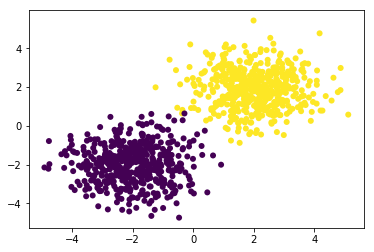

In [4]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [5]:
net = Sequential()
net.add(Linear(2, 2))
net.add(SoftMax())

criterion = ClassNLLCriterion()


# Test something like that then 
net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(SoftMax())

print(net)


Linear 4 -> 2
ReLU
Linear 2 -> 4
SoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [6]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [7]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

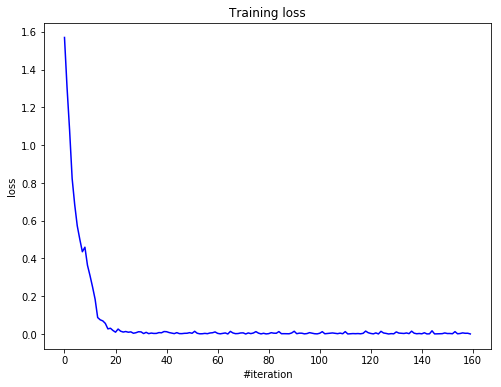

Current loss: 0.000400


In [8]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We are using [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset. Lets start with [cool visualization](http://scs.ryerson.ca/~aharley/vis/). The most beautiful demo is the second one, if you are not familiar with convolutions you can return to it in several lectures. 

In [3]:
import os
from sklearn.datasets import fetch_mldata

# Fetch MNIST dataset and create a local copy.
if os.path.exists('mnist.npz'):
    with np.load('mnist.npz', 'r') as data:
        X = data['X']
        y = data['y']
else:
    mnist = fetch_mldata("mnist-original")
    X, y = mnist.data / 255.0, mnist.target
    np.savez('mnist.npz', X=X, y=y)

One-hot encode the labels first.

In [4]:
y = np.stack([1. * (y == i) for i in range(10)]).T
X.shape, y.shape

((70000, 784), (70000, 10))

- **Compare** `ReLU`, `ELU` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.

In [5]:
# Your code goes here. ################################################

## Firstly, we should write the wrapper to avoid копипаста

In [96]:
class NetSkearnWrapper:
    def __init__(self, net, criterion,
                 n_epoch = 20, batch_size = 128,
                 optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9},
                 optimizer_state = None):
        self.net = net
        self.criterion = criterion
        
        self.n_epoch = n_epoch
        self.batch_size = batch_size
        
        self.optimizer_config = optimizer_config
        if optimizer_state is None:
            self.optimizer_state = dict()
        
    def fit(self, X, Y):
        def get_batches(dataset, batch_size):
            X, Y = dataset
            n_samples = X.shape[0]

            # Shuffle at the start of epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)

            for start in range(0, n_samples, batch_size):
                end = min(start + batch_size, n_samples)

                batch_idx = indices[start:end]

                yield X[batch_idx], Y[batch_idx]
                
        def sgd_momentum(x, dx, config, state):
            """
                This is a very ugly implementation of sgd with momentum 
                just to show an example how to store old grad in state.

                config:
                    - momentum
                    - learning_rate
                state:
                    - old_grad
            """

            # x and dx have complex structure, old dx will be stored in a simpler one
            state.setdefault('old_grad', {})

            i = 0 
            for cur_layer_x, cur_layer_dx in zip(x,dx): 
                for cur_x, cur_dx in zip(cur_layer_x,cur_layer_dx):

                    cur_old_grad = state['old_grad'].setdefault(i, np.zeros_like(cur_dx))

                    np.add(config['momentum'] * cur_old_grad, config['learning_rate'] * cur_dx, out = cur_old_grad)

                    cur_x -= cur_old_grad
                    i += 1     
                    
        def raw_fit():
            loss_history = []
            
            for i in range(self.n_epoch):
                if 'update_by_epoch' in self.optimizer_config:
                    self.optimizer_config = self.optimizer_config['update_by_epoch'](self.optimizer_config, i)
                for x_batch, y_batch in get_batches((X, Y), self.batch_size):

                    self.net.zeroGradParameters()

                    # Forward
                    predictions = self.net.forward(x_batch)
                    loss = self.criterion.forward(predictions, y_batch)

                    # Backward
                    dp = self.criterion.backward(predictions, y_batch)
                    self.net.backward(x_batch, dp)

                    # Update weights
                    sgd_momentum(self.net.getParameters(), 
                                 self.net.getGradParameters(), 
                                 self.optimizer_config,
                                 self.optimizer_state)      

                    loss_history.append(loss)

                # Visualize
                display.clear_output(wait=True)
                plt.figure(figsize=(8, 6))

                plt.title("Training loss")
                plt.xlabel("#iteration")
                plt.ylabel("loss")
                plt.plot(loss_history, 'b')
                plt.show()

                print('Current loss: %f' % loss)    
                
        raw_fit()
        self.net.evaluate()
        
    def predict(self, X):
        return self.net.forward(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, )
a, b = y_train.shape[0], y_test.shape[0]
print("Test size = ", float(b) / (a + b))

Test size =  0.25


In [38]:
def fst_arch(layer):
    np.random.seed(17) 
    net = Sequential()
    net.add(Linear(784, 10))
    net.add(layer())
    net.add(Linear(10, 10))
    net.add(layer())
    net.add(SoftMax())



    clf = NetSkearnWrapper(net, ClassNLLCriterion(), n_epoch=40,
                           optimizer_config = {'learning_rate' : 0.05, 'momentum': 0.9})
    clf.fit(X_train, y_train)
    print("Accuracy = ", accuracy_score(clf.predict(X_test).argmax(axis=1),y_test.argmax(axis=1)))
    print(net)

In [39]:
def snd_arch(layer):
    np.random.seed(17)
    net = Sequential()
    net.add(Linear(784, 100))
    net.add(layer())
    net.add(Linear(100, 100))
    net.add(layer())
    net.add(Linear(100, 10))
    net.add(layer())
    net.add(SoftMax())

    clf = NetSkearnWrapper(net, ClassNLLCriterion(), n_epoch=40,
                           optimizer_config = {'learning_rate' : 0.05, 'momentum': 0.9})
    clf.fit(X_train, y_train)
    print("Accuracy = ", accuracy_score(clf.predict(X_test).argmax(axis=1),y_test.argmax(axis=1)))
    print(net)

## ReLU, два похода

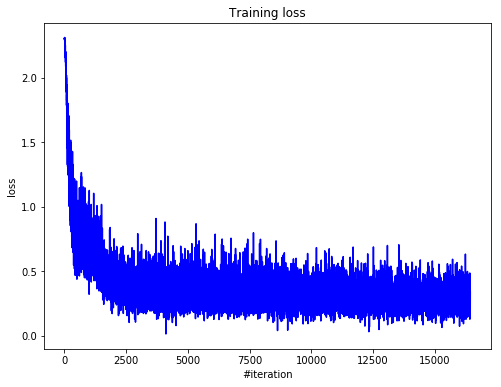

Current loss: 0.340609
Accuracy =  0.8974857142857143
Linear 10 -> 784
ReLU
Linear 10 -> 10
ReLU
SoftMax



In [40]:
fst_arch(ReLU)

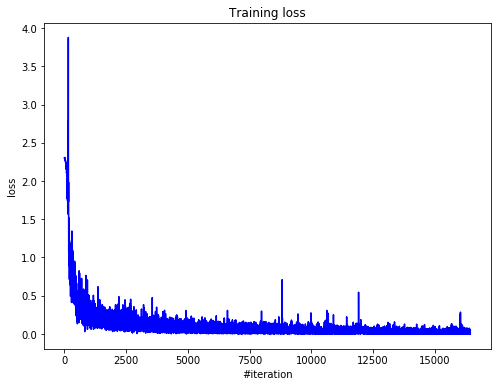

Current loss: 0.000123
Accuracy =  0.976
Linear 100 -> 784
ReLU
Linear 100 -> 100
ReLU
Linear 10 -> 100
ReLU
SoftMax



In [41]:
snd_arch(ReLU)

## LeakyReLU, те же архитектуры

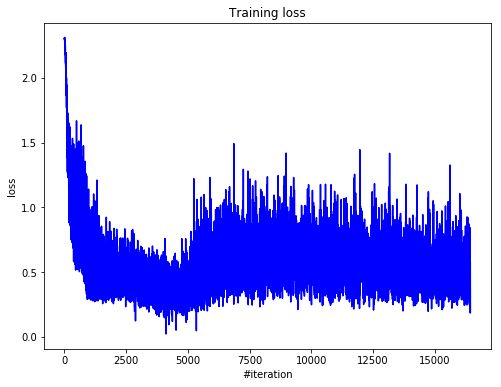

Current loss: 0.186192
Accuracy =  0.8634285714285714
Linear 10 -> 784
LeakyReLU
Linear 10 -> 10
LeakyReLU
SoftMax



In [42]:
fst_arch(LeakyReLU)

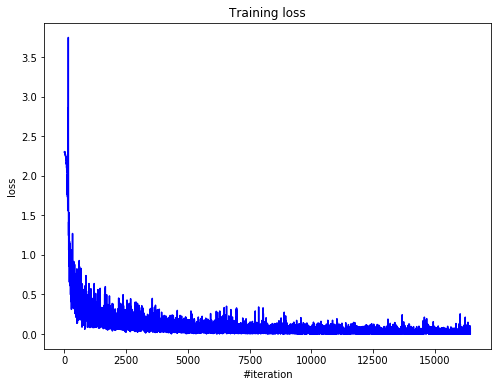

Current loss: 0.006607
Accuracy =  0.9732
Linear 100 -> 784
LeakyReLU
Linear 100 -> 100
LeakyReLU
Linear 10 -> 100
LeakyReLU
SoftMax



In [43]:
snd_arch(LeakyReLU)

## ELU, те же архитектуры

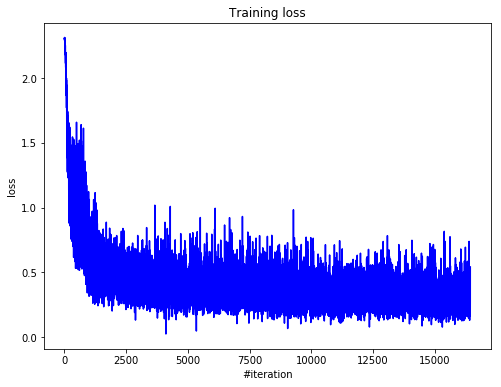

Current loss: 0.541572
Accuracy =  0.9062857142857143
Linear 10 -> 784
ELU
Linear 10 -> 10
ELU
SoftMax



In [48]:
fst_arch(ELU)

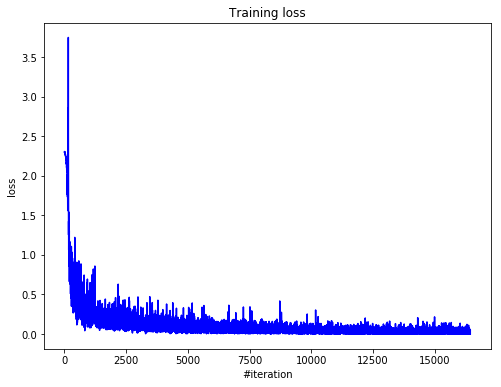

Current loss: 0.001619
Accuracy =  0.9757142857142858
Linear 100 -> 784
ELU
Linear 100 -> 100
ELU
Linear 10 -> 100
ELU
SoftMax



In [49]:
snd_arch(ELU)

**Комментарий:** (смотрим на accuracy, ибо оно максимально интерпретируемо) ELU показывает себя чуть луше, чем ReLU, тогда как LeakyReLU показывает результат чуть хуже на этих тестах (результаты по второй архитектуре почти не отличаются)

**Finally**, use all your knowledge to build a super cool model on this dataset, <font color="red">do not forget to split dataset into train and validation</font> (кросс-валидация - не, не слышал?). Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. 

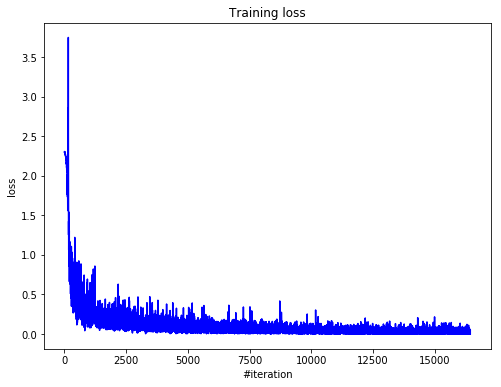

Current loss: 0.001619
Linear 100 -> 784
ELU
Linear 100 -> 100
ELU
Linear 10 -> 100
ELU
SoftMax



In [77]:
# Your code goes here. ################################################
np.random.seed(17)
net = Sequential()
net.add(Linear(784, 100))
net.add(ELU())
net.add(Linear(100, 100))
net.add(ELU())
net.add(Linear(100, 10))
net.add(ELU())
net.add(SoftMax())

clf = NetSkearnWrapper(net, ClassNLLCriterion(), n_epoch=40,
                       optimizer_config = {'learning_rate' : 0.05, 'momentum': 0.9})
clf.fit(X_train, y_train)
print(net)

Print here your accuracy. It should be around 90%.

In [76]:
# Your answer goes here. ################################################
p = int(round(accuracy_score(clf.predict(X_test).argmax(axis=1),y_test.argmax(axis=1)), 2) * 100)
print("Accuracy = {}%".format(p))

Accuracy = 98%


# Bonus Part: Autoencoder 

<font color="red"> В задании фигурировали данные с двумя классами (cnet.add(Linear(30, 2))) с 784 признаками, но там 10 классов. Т.е. или нужно исправить число классов или использовать другие данные (какие?), чего не сказано в задании. Очевидно, что требуемые в задании качества не получены, т.е. вместо ошибки в 6,0 получено 60 (код ниже предсказвает для 10 классов) </font>

This part is **OPTIONAL**, you may not do it. It will not be scored, but it is easy and interesting.

Now we are going to build a cool model, named autoencoder. The aim is simple: **encode** the data to a lower dimentional representation. Why? Well, if we can **decode** this representation back to original data with "small" reconstuction loss then we can store only compressed representation saving memory. But the most important thing is -- we can reuse trained autoencoder for classification. 
<img src="img/autoencoder.png">

Picture from this [site](http://multithreaded.stitchfix.com/blog/2015/09/17/deep-style/).

Now implement an autoencoder:

Build it such that dimetionality inside autoencoder changes like that: 

$$784 \text{ (data)} -> 512 -> 256 -> 128 -> 30 -> 128 -> 256 -> 512 -> 784$$

Use **MSECriterion** to score the reconstruction.

You may train it for 9 epochs with batch size = 256, initial lr = 0.1 droping by a factor of 2 every 3 epochs. The reconstruction loss should be about 6.0 and visual quality decent already.
Do not spend time on changing architecture, they are more or less the same. 

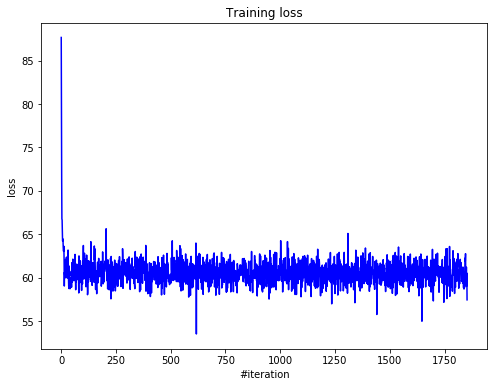

Current loss: 57.431313


In [139]:
# Your code goes here. ################################################

np.random.seed(17)
net = Sequential()
net.add(Linear(784, 512))
net.add(ReLU())
net.add(Linear(512, 256))
net.add(ReLU())
net.add(Linear(256, 128))
net.add(ReLU())
net.add(Linear(128, 30))
net.add(ReLU())
net.add(Linear(30, 128))
net.add(ReLU())
net.add(Linear(128, 256))
net.add(ReLU())
net.add(Linear(256, 512))
net.add(ReLU())
net.add(Linear(512, 784))
net.add(ReLU())

def update(x, epoch):
    x['learning_rate'] = 0.1 / (2 ** (epoch / 3))
    return x

clf = NetSkearnWrapper(net, MSECriterion(), n_epoch=9, batch_size=256,
                       optimizer_config = {'learning_rate' : 0.1,
                                           'momentum': 0.9,
                                           'update_by_epoch': update})
clf.fit(X_train, X_train)

Some time ago NNs were a lot poorer and people were struggling to learn deep models. To train a classification net people were training autoencoder first (to train autoencoder people were pretraining single layers with [RBM](https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine)), then substituting the decoder part with classification layer (yeah, they were struggling with training autoencoders a lot, and complex techniques were used at that dark times). We are going to this now, fast and easy.  

In [140]:
# Extract inner representation for train and validation, 
# you should get (n_samples, 30) matrices
# Your code goes here. ################################################

def get_inner(X_train):
    X_train_inner = []
    for x in X_train:
        clf.predict([x])
        X_train_inner.append(clf.net.modules[7].output.reshape(-1))
    return np.array(X_train_inner)
    
X_train_inner = get_inner(X_train)
X_test_inner = get_inner(X_test)

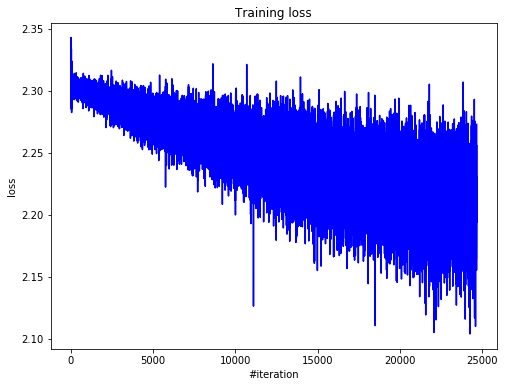

Current loss: 2.272721
Accuracy = 0.18285714285714286%


In [141]:
# Now build a logistic regression or small classification net
cnet = Sequential()
cnet.add(Linear(30, 10))  # здесь было 2, но ведь классов то 10? Или опять проблемы с условием?
cnet.add(SoftMax())

# Learn the weights
# Your code goes here. ################################################
clf = NetSkearnWrapper(cnet, ClassNLLCriterion(), n_epoch=60,
                       optimizer_config = {'learning_rate' : 0.05, 'momentum': 0.9})
clf.fit(X_train_inner, y_train)
print("Accuracy = {}%".format(accuracy_score(clf.predict(X_test_inner).argmax(axis=1),y_test.argmax(axis=1))))

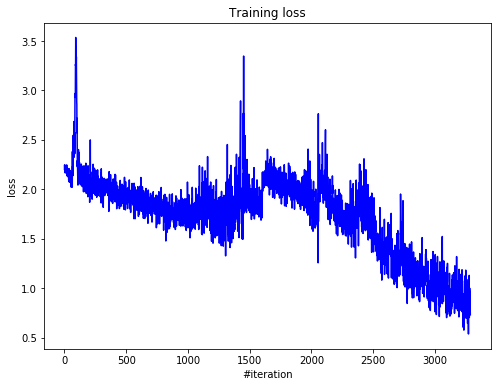

Current loss: 0.731833
Accuracy = 0.7066857142857143%


In [142]:
# Now chop off decoder part
# (you may need to implement `remove` method for Sequential container) 
# Your code goes here. ################################################
np.random.seed(17)
autoenc = Sequential()
autoenc.modules = net.modules[:8]
# And add learned layers ontop.
autoenc.add(cnet[0])
autoenc.add(cnet[1])
print(autoenc)
# Now optimize whole model
# Your code goes here. ################################################

clf = NetSkearnWrapper(autoenc, ClassNLLCriterion(), n_epoch=8,
                       optimizer_config = {'learning_rate' : 0.005, 'momentum': 0.9})
clf.fit(X_train, y_train)
print("Accuracy = {}%".format(accuracy_score(clf.predict(X_test).argmax(axis=1),y_test.argmax(axis=1))))

* What do you think, does it make sense to build real-world classifiers this way ? Did it work better for you than a straightforward one? Looks like it was not the same ~8 years ago, what has changed beside computational power? 

**Комментарий:** По резльтатам, полученным выше обучать так классификаторы весьма бесполезно. Возможно, дело в том, что какой-то из слоёв был мною недообучен, но "прямолинейный" подход кажется выгодным как минимум именно по этому: не нужно думать о согласовании разных частей.

Run PCA with 30 components on the *train set*, plot original image, autoencoder and PCA reconstructions side by side for 10 samples from *validation set*.
Probably you need to use the following snippet to make aoutpencoder examples look comparible.

In [157]:
# np.clip(prediction,0,1)
#
# Your code goes here. ################################################
def plot(X_test, X_train):
    plt.figure(figsize=(20,4))

    for index, (image, label) in enumerate(zip(X_train[:10], y_train[:10])):
        plt.subplot(1, 10, index+1)
        plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
        plt.title('Training: %i\n' % label.argmax(), fontsize = 20)
    plt.figure(figsize=(20,4))

    for index, (image, label) in enumerate(zip(X_test[:10], y_test[:10])):
        plt.subplot(1, 10, index+1)
        plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
        plt.title('Training: %i\n' % label.argmax(), fontsize = 20)

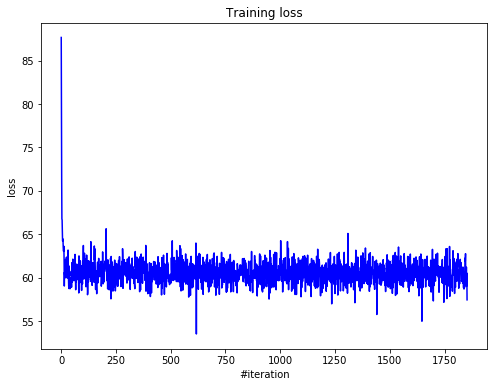

Current loss: 57.431313


In [168]:
# Your code goes here. ################################################

np.random.seed(17)
net = Sequential()
net.add(Linear(784, 512))
net.add(ReLU())
net.add(Linear(512, 256))
net.add(ReLU())
net.add(Linear(256, 128))
net.add(ReLU())
net.add(Linear(128, 30))
net.add(ReLU())
net.add(Linear(30, 128))
net.add(ReLU())
net.add(Linear(128, 256))
net.add(ReLU())
net.add(Linear(256, 512))
net.add(ReLU())
net.add(Linear(512, 784))
net.add(ReLU())

def update(x, epoch):
    x['learning_rate'] = 0.1 / (2 ** (epoch / 3))
    return x

clf = NetSkearnWrapper(net, MSECriterion(), n_epoch=9, batch_size=256,
                       optimizer_config = {'learning_rate' : 0.1,
                                           'momentum': 0.9,
                                           'update_by_epoch': update})
clf.fit(X_train, X_train)

### ORIGINAL

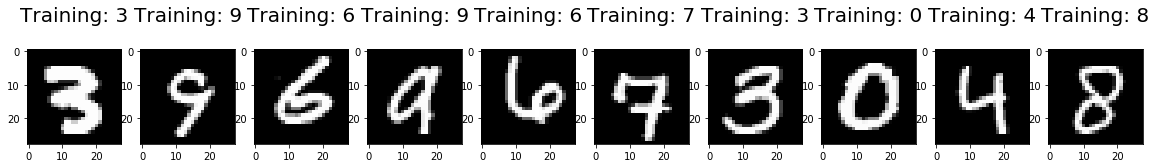

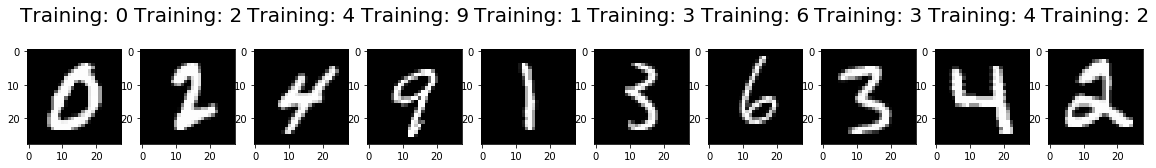

In [169]:
plot(X_test, X_train)  # Сначала train, после - test

### AUTOENCODED

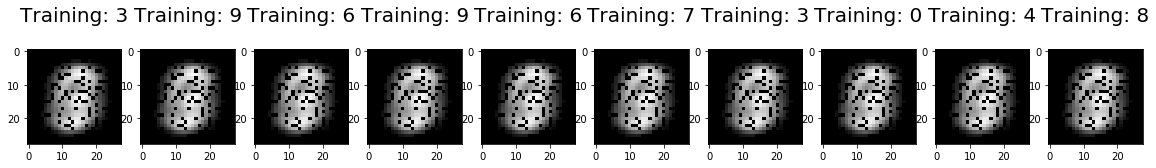

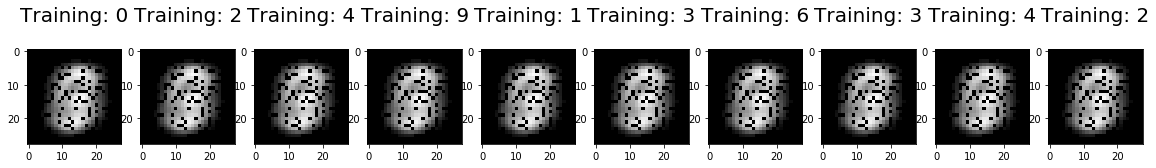

In [170]:
X_train_predicted = clf.predict(X_train[:10])
X_test_predicted = clf.predict(X_test[:10])
plot(X_train_predicted, X_test_predicted)  # Сначала train, после - test

In [171]:
(clf.predict([X_train[0]]) == clf.predict([X_train[1]])).all(), (X_train[0] == X_train[1]).all()

(True, False)

**Комментарий:** Наш алгоритм научился предсказывать константу.(